In [46]:
import json
import pandas as pd
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns

# plotting config
textwidth_pt = 395.8225

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [47]:
set_size(textwidth_pt)

(5.47699598726996, 3.3849696763796215)

In [36]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim


In [2]:
def get_measurements(measurements_dir: str = 'measurements/'):
    measurements = []
    pathlist = Path(measurements_dir).glob('*.json')
    
    for path in pathlist:
        with open(path) as f:
            res = json.load(f)
            run, dataset = path.name.split('.')[0].split('-')
            res = {'run': run, 'dataset': dataset, **res}
            measurements.append(res)
    
    print(f'{len(measurements)} measurements loaded.')
    return measurements

In [3]:
results = get_measurements('measurements/20241031-hospital-replica/')
df = pd.DataFrame(results)

50 measurements loaded.


In [17]:
df[df['dataset'] == 'hospital'].repair_f1.mean()

np.float64(0.6956521739130437)

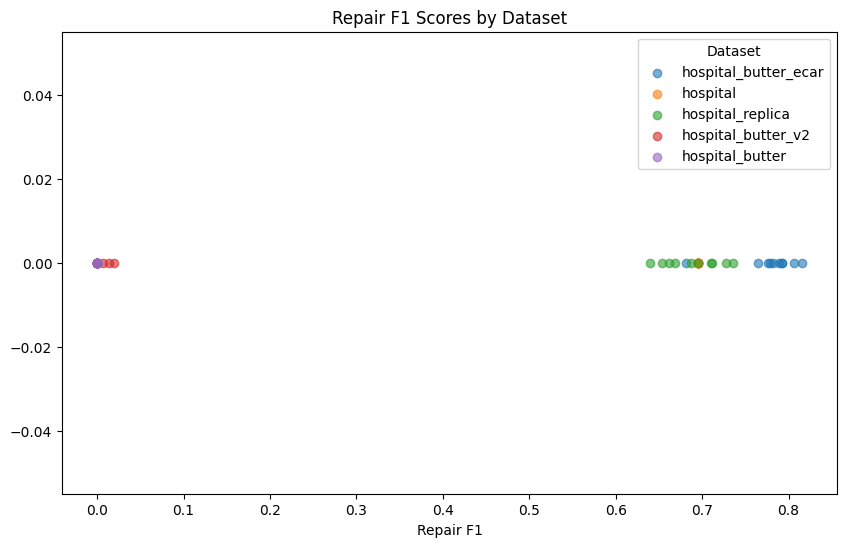

In [4]:
plt.figure(figsize=(10, 6))

# Use unique dataset values to loop and plot each with a different color
for dataset_name in df['dataset'].unique():
    subset = df[df['dataset'] == dataset_name]
    plt.scatter(subset['repair_f1'], [0] * len(subset), label=dataset_name, alpha=0.6)

# Add labels and title
plt.xlabel('Repair F1')
plt.title('Repair F1 Scores by Dataset')
plt.legend(title='Dataset')

# Show plot
plt.show()

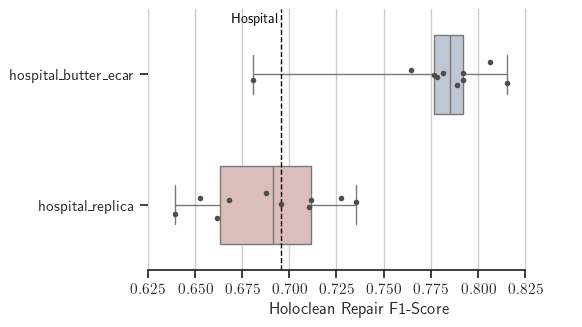

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

df_sub = df[df['dataset'].isin(['hospital_replica', 'hospital_butter_ecar',])]

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=set_size(textwidth_pt))
ax.set_xlim(0.625, 0.85)

# Plot the orbital period with horizontal boxes
sns.boxplot(
    df_sub, x="repair_f1", y="dataset", hue="dataset",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df_sub, x="repair_f1", y="dataset", size=4, color=".3")

# add reference to hosp
hosp_baseline = df[df['dataset'] == 'hospital'].repair_f1.iloc[0]
ax.axvline(x=hosp_baseline, color='black', linestyle='--', linewidth=1)
ax.text(hosp_baseline - 0.001, ax.get_ylim()[1] * 0.95, "Hospital", color='black', 
        ha='right', va='top', rotation=0, fontsize=10, fontweight='bold')


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="Holoclean Repair F1-Score")
sns.despine(trim=True, left=True)
plt.savefig("img/2024-11-04-hospital-butterfingers.pdf", format='pdf', bbox_inches='tight', dpi=300)
plt.show()